Loading the Data

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Add appropriate column names
header_names = ['rock_number', 'category_number', 'subtype_number', \
                'token_number', 'stimulus_type', 'freq_igneous', \
                'freq_metamorphic', 'freq_sedimentary', 'freq_old', \
                'freq_new', 'prop_igneous', 'prop_metamorphic', \
                'prop_sedimentary', 'prop_old']

aggregate_rock = pd.read_excel('/content/drive/MyDrive/aggregateRockData.xlsx', header = None, names = header_names)

aggregate_rock.head()

,rock_number,category_number,subtype_number,token_number,stimulus_type,freq_igneous,freq_metamorphic,freq_sedimentary,freq_old,freq_new,prop_igneous,prop_metamorphic,prop_sedimentary,prop_old
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659
4,5,1,1,5,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878


In [66]:
# Add appropriate column names
header_names = ['rock_number', 'subtype_number', 'token_number', 'angular_fragments', \
                'rounded_fragments', 'straight_stripes', 'curved_stripes', 'physical_layers', \
                'veins', 'oily/shimmery_texture', 'splotchy_texture', 'single_translucent_crystal', \
                'multiple_cubic_crystals', 'sandy_texture', 'fragments', 'stripes', 'crystals']

feature_prescence = pd.read_table('/content/drive/MyDrive/feature_presence540.txt', sep='\s+', header = None, names = header_names)

feature_prescence.head()

,rock_number,subtype_number,token_number,angular_fragments,rounded_fragments,straight_stripes,curved_stripes,physical_layers,veins,oily/shimmery_texture,splotchy_texture,single_translucent_crystal,multiple_cubic_crystals,sandy_texture,fragments,stripes,crystals
0,1,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,0.32,0.0,0.00
1,2,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,0.70,0.0,0.05
2,3,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,0.60,0.0,0.00
3,4,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,0.86,0.0,0.00
4,5,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,0.87,0.0,0.00


In [67]:
print(aggregate_rock.shape)
print(feature_prescence.shape)

(540, 14)
(555, 17)


In [68]:
#First 480 rows and the category number (rock type column)
target = aggregate_rock.iloc[:480, 1]
target.head()

,category_number
0,1
1,1
2,1
3,1
4,1


In [69]:
#First 480 rows and columns 3 to 14
features = feature_prescence.iloc[:480, 2:14]
features.head()

,token_number,angular_fragments,rounded_fragments,straight_stripes,curved_stripes,physical_layers,veins,oily/shimmery_texture,splotchy_texture,single_translucent_crystal,multiple_cubic_crystals,sandy_texture
0,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [70]:
#Combine feature and target data into one data frame
combined_data = pd.concat([features, target], axis = 1)
combined_data.head()

,token_number,angular_fragments,rounded_fragments,straight_stripes,curved_stripes,physical_layers,veins,oily/shimmery_texture,splotchy_texture,single_translucent_crystal,multiple_cubic_crystals,sandy_texture,category_number
0,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,1
1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,1
2,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,1
3,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,1
4,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,1


In [71]:
#First 4 values are objects but we wanted columns 2-4 to be floats
combined_data.dtypes

,0
token_number,object
angular_fragments,object
rounded_fragments,object
straight_stripes,object
curved_stripes,float64
physical_layers,float64
veins,float64
oily/shimmery_texture,float64
splotchy_texture,float64
single_translucent_crystal,float64


In [72]:
combined_data['angular_fragments'] = combined_data['angular_fragments'].astype(float)
combined_data['rounded_fragments'] = combined_data['rounded_fragments'].astype(float)
combined_data['straight_stripes'] = combined_data['straight_stripes'].astype(float)

In [73]:
combined_data.dtypes

,0
token_number,object
angular_fragments,float64
rounded_fragments,float64
straight_stripes,float64
curved_stripes,float64
physical_layers,float64
veins,float64
oily/shimmery_texture,float64
splotchy_texture,float64
single_translucent_crystal,float64


**1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require? [2 points]**

In [74]:
combined_data.describe()

,angular_fragments,rounded_fragments,straight_stripes,curved_stripes,physical_layers,veins,oily/shimmery_texture,splotchy_texture,single_translucent_crystal,multiple_cubic_crystals,sandy_texture,category_number
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.084479,0.080208,0.067729,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854,2.000000
std,0.193996,0.197648,0.194792,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149,0.817348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000,2.000000
75%,0.050000,0.050000,0.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000,3.000000
max,1.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000,3.000000


In [75]:
combined_data.isnull().sum()

,0
token_number,0
angular_fragments,0
rounded_fragments,0
straight_stripes,0
curved_stripes,0
physical_layers,0
veins,0
oily/shimmery_texture,0
splotchy_texture,0
single_translucent_crystal,0


All the features seem to be between 0 and 1, so the data is likely already normalized. There will likely not be any outliers. The target data has a mean of exactly 2 and there are 3 categories: Rock with label 1, 2, or 3. Since the mean is exactly 2, I'm guessing there's an equal amount of 1, 2, and 3 rocks in the data. We also don't have any null values to worry about.

Text(0.5, 1.0, 'Histogram of Category Number')

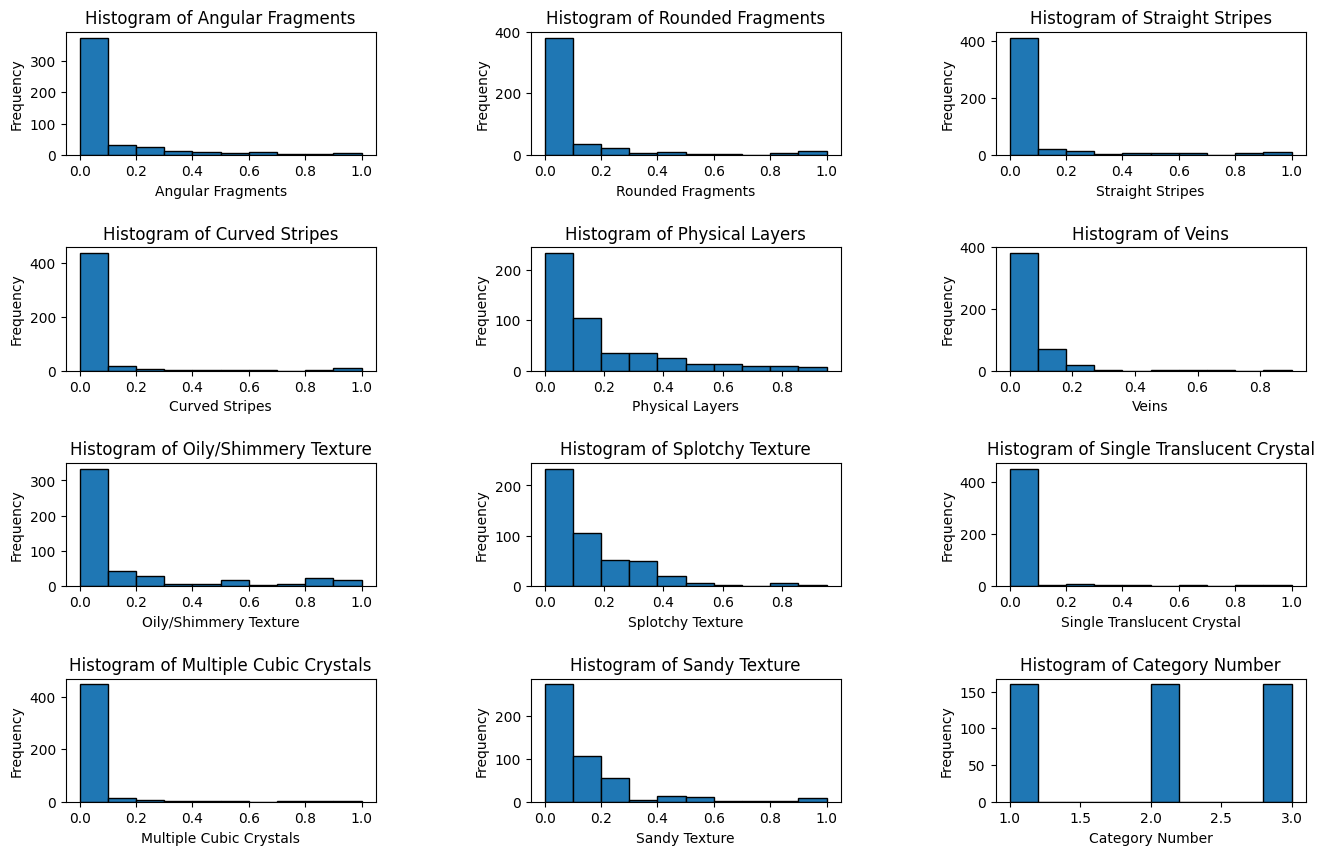

In [76]:
#Subplot grid with 4 rows and 3 columns
fig, axes = plt.subplots(4, 3, figsize=(16, 10))

# Increase Horizontal and Vertical Space Between Plots two make plots look better
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.75)

axes[0, 0].hist(combined_data['angular_fragments'], edgecolor = 'black')
axes[0, 0].set_xlabel('Angular Fragments')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Angular Fragments')

axes[0, 1].hist(combined_data['rounded_fragments'], edgecolor = 'black')
axes[0, 1].set_xlabel('Rounded Fragments')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Rounded Fragments')

axes[0, 2].hist(combined_data['straight_stripes'], edgecolor = 'black')
axes[0, 2].set_xlabel('Straight Stripes')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Histogram of Straight Stripes')


axes[1, 0].hist(combined_data['curved_stripes'], edgecolor = 'black')
axes[1, 0].set_xlabel('Curved Stripes')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Curved Stripes')

axes[1, 1].hist(combined_data['physical_layers'], edgecolor = 'black')
axes[1, 1].set_xlabel('Physical Layers')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Physical Layers')

axes[1, 2].hist(combined_data['veins'], edgecolor = 'black')
axes[1, 2].set_xlabel('Veins')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Histogram of Veins')


axes[2, 0].hist(combined_data['oily/shimmery_texture'], edgecolor = 'black')
axes[2, 0].set_xlabel('Oily/Shimmery Texture')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Histogram of Oily/Shimmery Texture')

axes[2, 1].hist(combined_data['splotchy_texture'], edgecolor = 'black')
axes[2, 1].set_xlabel('Splotchy Texture')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title('Histogram of Splotchy Texture')

axes[2, 2].hist(combined_data['single_translucent_crystal'], edgecolor = 'black')
axes[2, 2].set_xlabel('Single Translucent Crystal')
axes[2, 2].set_ylabel('Frequency')
axes[2, 2].set_title('Histogram of Single Translucent Crystal')


axes[3, 0].hist(combined_data['multiple_cubic_crystals'], edgecolor = 'black')
axes[3, 0].set_xlabel('Multiple Cubic Crystals')
axes[3, 0].set_ylabel('Frequency')
axes[3, 0].set_title('Histogram of Multiple Cubic Crystals')

axes[3, 1].hist(combined_data['sandy_texture'], edgecolor = 'black')
axes[3, 1].set_xlabel('Sandy Texture')
axes[3, 1].set_ylabel('Frequency')
axes[3, 1].set_title('Histogram of Sandy Texture')

axes[3, 2].hist(combined_data['category_number'], edgecolor = 'black')
axes[3, 2].set_xlabel('Category Number')
axes[3, 2].set_ylabel('Frequency')
axes[3, 2].set_title('Histogram of Category Number')

The features are skewed right, but this shouldn't be a big deal because the data is normalized. If this is a problem, we can go back and add a transformation  to the features.

There is an equal amount of 1's, 2's, and 3's in our target class, so we don't have to worry about unequal class distributions being a problem.



**2. Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [3 points]** **bold text**

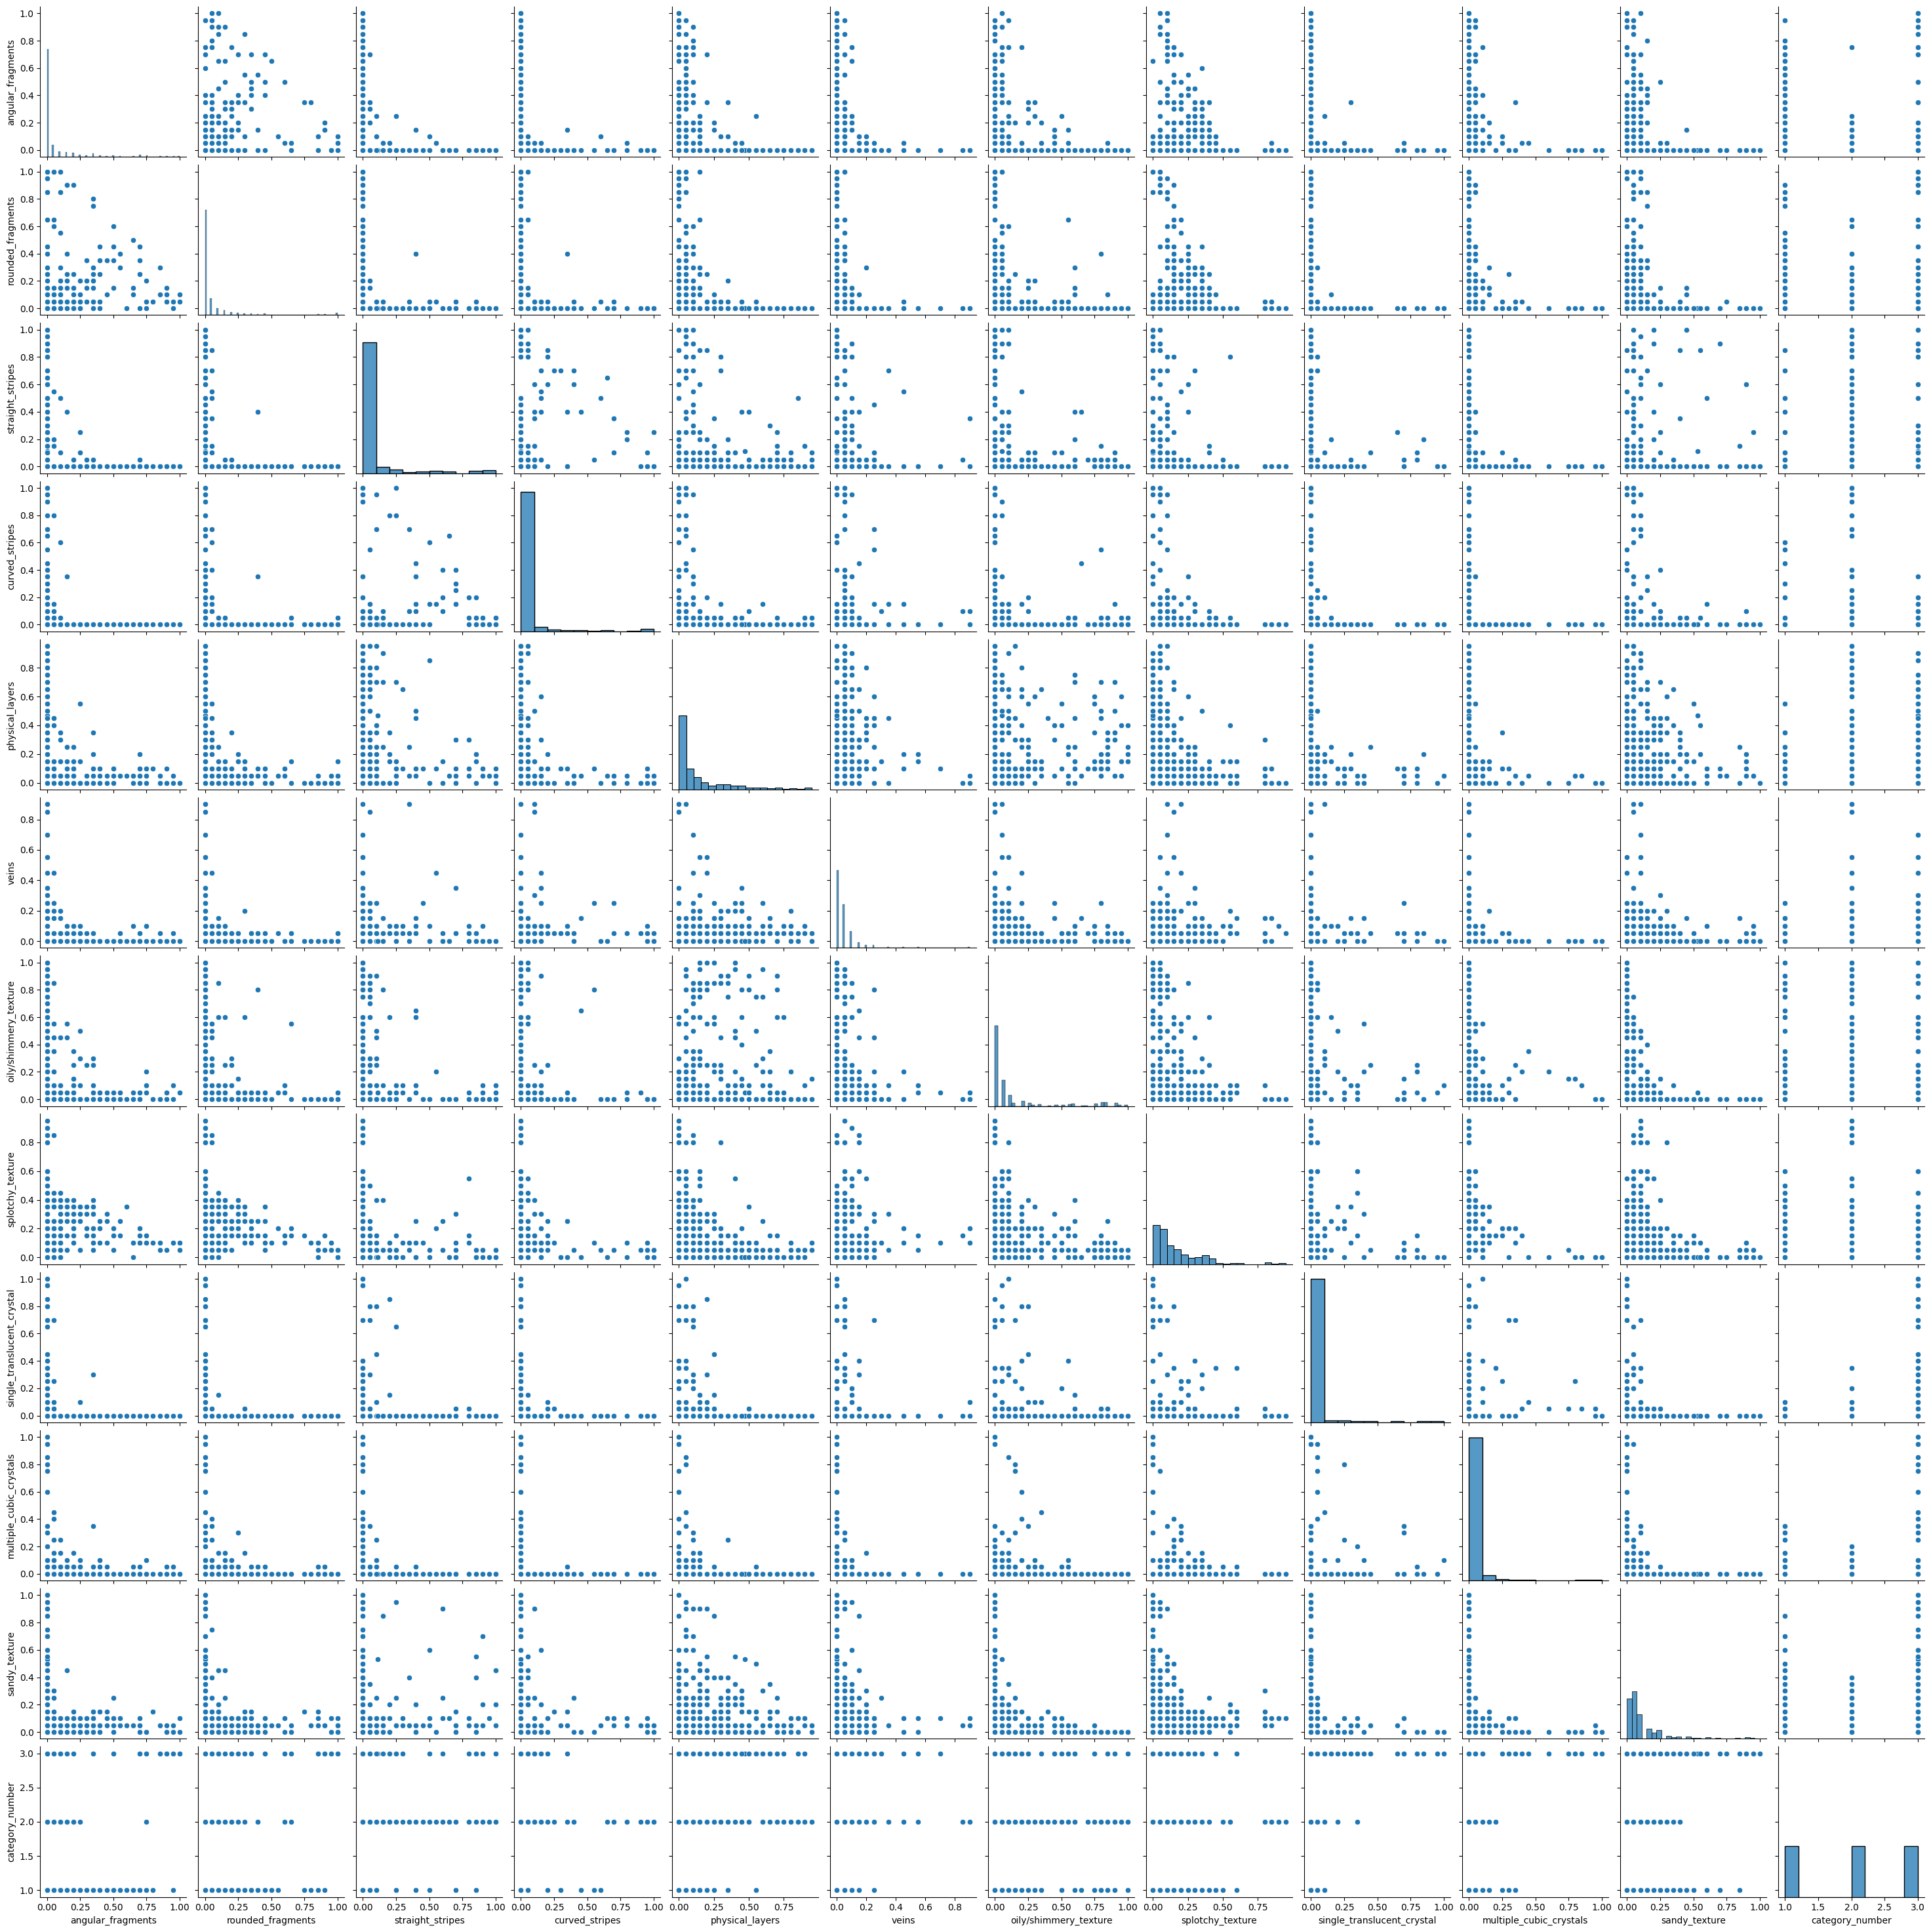

In [77]:
sns.pairplot(combined_data)

In [78]:
combined_data.corr()

,token_number,angular_fragments,rounded_fragments,straight_stripes,curved_stripes,physical_layers,veins,oily/shimmery_texture,splotchy_texture,single_translucent_crystal,multiple_cubic_crystals,sandy_texture,category_number
token_number,1.000000e+00,0.003556,-0.002632,-0.049946,-0.035272,0.057043,0.028530,0.002001,-0.036710,0.057032,-0.001513,0.045294,-8.829406e-16
angular_fragments,3.556392e-03,1.000000,0.250326,-0.133497,-0.103118,-0.225362,-0.123902,-0.150316,0.063420,-0.087195,-0.018756,-0.165639,-1.224469e-01
rounded_fragments,-2.632315e-03,0.250326,1.000000,-0.123095,-0.083384,-0.235652,-0.141425,-0.140435,0.005265,-0.092404,-0.041817,-0.136152,1.744612e-02
straight_stripes,-4.994586e-02,-0.133497,-0.123095,1.000000,0.196752,-0.026329,0.042965,-0.105445,-0.135787,-0.025440,-0.069152,0.112303,7.749481e-02
curved_stripes,-3.527214e-02,-0.103118,-0.083384,0.196752,1.000000,-0.134700,0.045330,-0.070313,-0.116348,-0.056443,-0.056908,-0.071011,-1.745444e-02
physical_layers,5.704335e-02,-0.225362,-0.235652,-0.026329,-0.134700,1.000000,0.061391,0.184191,-0.295079,-0.102496,-0.131038,-0.041839,2.666991e-01
veins,2.853021e-02,-0.123902,-0.141425,0.042965,0.045330,0.061391,1.000000,-0.095940,0.040470,-0.007707,-0.089083,-0.054820,1.405526e-01
oily/shimmery_texture,2.000768e-03,-0.150316,-0.140435,-0.105445,-0.070313,0.184191,-0.095940,1.000000,-0.224798,-0.018165,-0.037376,-0.315414,8.171521e-03
splotchy_texture,-3.670989e-02,0.063420,0.005265,-0.135787,-0.116348,-0.295079,0.040470,-0.224798,1.000000,-0.065659,-0.073539,-0.166148,-2.292728e-01
single_translucent_crystal,5.703188e-02,-0.087195,-0.092404,-0.025440,-0.056443,-0.102496,-0.007707,-0.018165,-0.065659,1.000000,0.115054,-0.134821,2.589103e-01


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'token_number'),
  Text(1.5, 0, 'angular_fragments'),
  Text(2.5, 0, 'rounded_fragments'),
  Text(3.5, 0, 'straight_stripes'),
  Text(4.5, 0, 'curved_stripes'),
  Text(5.5, 0, 'physical_layers'),
  Text(6.5, 0, 'veins'),
  Text(7.5, 0, 'oily/shimmery_texture'),
  Text(8.5, 0, 'splotchy_texture'),
  Text(9.5, 0, 'single_translucent_crystal'),
  Text(10.5, 0, 'multiple_cubic_crystals'),
  Text(11.5, 0, 'sandy_texture'),
  Text(12.5, 0, 'category_number')])

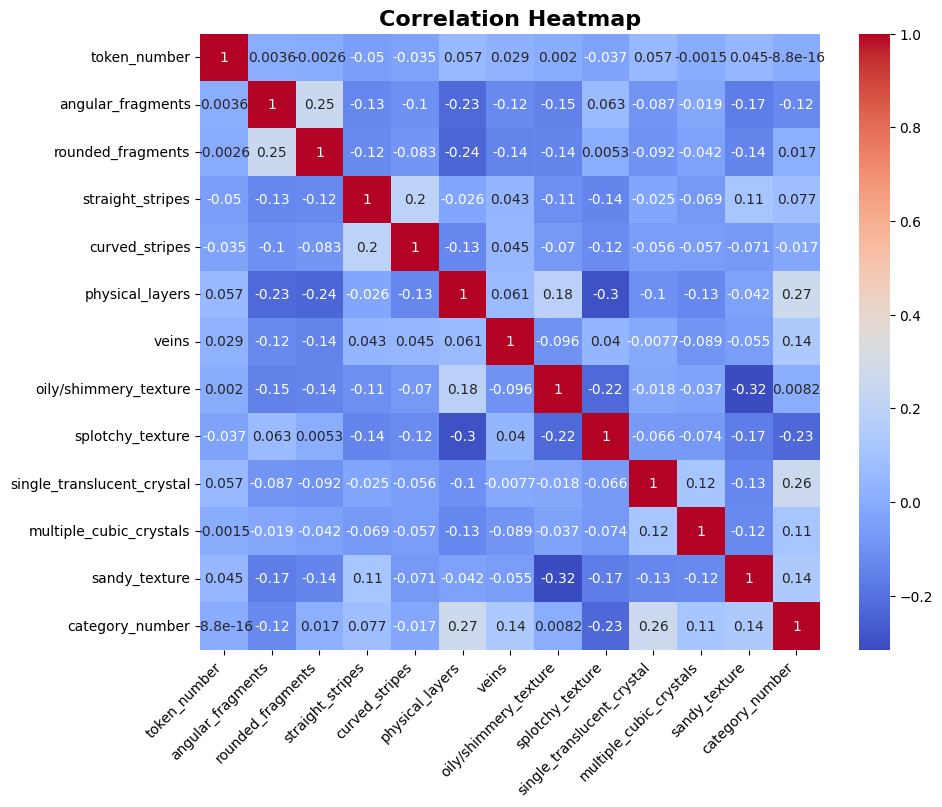

In [79]:
#Heatmap created with help of ChatGPT

corr_matrix = combined_data.corr()
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap', fontsize = 16, fontweight ='bold')
plt.xticks(rotation=45, ha='right')

It's a little difficult to compare all the relationships at first, since there are so many variables, but it's easier to see with the heatmap.

None of the predictors are very strongly correlated. The highest absolute correlation was between sandy texture and oily/shimmery texture with a correlation of -0.32.

We shouldn't have many confounding variables in our features and each should be adding mostly new information to our models.

I don't know enough about rocks to know if there is meaningful order between our target class having igneous = 1, metamorphic = 2, and sedimentary = 3, but there's not any super strong correlations with the order of our target classes. The highest are physical layers, splotchy texture, and single translucent crystals with respective correlations of 0.27, -0.23, and 0.26.

We'll get a better representation of which features are best at predicting our target class when we get the features weights from the random forest model.

**3. For training data, use token numbers 7-16, for validation 4 to 6, and for testing 1 to 3 (each of the 30 rock subtypes has 16 token numbers). [2 points]**

In [80]:
#Need to change token number from string to int, so I can do math operations on it
combined_data['token_number'] = combined_data['token_number'].astype(int)

In [81]:
#Pandas syntax of how to split by token number done with help of Chat GPT
training = combined_data[combined_data['token_number'].between(7, 16)]
validation = combined_data[combined_data['token_number'].between(4, 6)]
testing = combined_data[combined_data['token_number'].between(1, 3)]

#Split into features and target (x and y)
training_x = training.iloc[:, 1:12]
training_y = training['category_number']

validation_x = validation.iloc[:, 1:12]
validation_y = validation['category_number']

testing_x = testing.iloc[:, 1:12]
testing_y = testing['category_number']

**4. Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):**

**A. Multinomial Logistic Regression (Softmax Regression); hyperparameters to explore: C, solver, max number of iterations. [10 points]**

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import random

def classify_data(model):
  '''Enter model and print accuracy, precision, recall, and f1 score rounded to 4 digits'''
  #Get rid of multi_class depreciated warning
  warnings.filterwarnings('ignore')
  #Set random seed
  random.seed(42)

  # Fit the training data
  model.fit(training_x, training_y)

  # Predict for the validation data
  validation_pred = model.predict(validation_x)

  # Calculate metrics
  accuracy = accuracy_score(validation_y, validation_pred)
  #Have to take weighted average for every non-accuracy metric
  precision = precision_score(validation_y, validation_pred, average='weighted')
  recall = recall_score(validation_y, validation_pred, average='weighted')
  f1 = f1_score(validation_y, validation_pred, average='weighted')

  print(f'Validation Accuracy: {accuracy:.4f}')
  print(f'Validation Precision: {precision:.4f}')
  print(f'Validation Recall: {recall:.4f}')
  print(f'Validation F1 Score: {f1:.4f}')

In [83]:
 #Default multinomial model based on slides
 softmax_reg = LogisticRegression(C = 1, multi_class = 'multinomial', solver = 'lbfgs', max_iter = 100)

 classify_data(softmax_reg)

Validation Accuracy: 0.6222
Validation Precision: 0.6263
Validation Recall: 0.6222
Validation F1 Score: 0.6208


Softmax Regression with Different C Values

In [84]:
#Default C is 1

c_values = [.0001, .001, .01, .1, 1, 10, 100, 1000]

for c in c_values:
  softmax_reg = LogisticRegression(C = c, multi_class = 'multinomial', solver = 'lbfgs')
  print(f'C: {c}')
  classify_data(softmax_reg)
  print()

C: 0.0001
Validation Accuracy: 0.5667
Validation Precision: 0.5930
Validation Recall: 0.5667
Validation F1 Score: 0.5357

C: 0.001
Validation Accuracy: 0.5444
Validation Precision: 0.5479
Validation Recall: 0.5444
Validation F1 Score: 0.5284

C: 0.01
Validation Accuracy: 0.5556
Validation Precision: 0.5617
Validation Recall: 0.5556
Validation F1 Score: 0.5430

C: 0.1
Validation Accuracy: 0.5889
Validation Precision: 0.5926
Validation Recall: 0.5889
Validation F1 Score: 0.5770

C: 1
Validation Accuracy: 0.6222
Validation Precision: 0.6263
Validation Recall: 0.6222
Validation F1 Score: 0.6208

C: 10
Validation Accuracy: 0.6111
Validation Precision: 0.6122
Validation Recall: 0.6111
Validation F1 Score: 0.6112

C: 100
Validation Accuracy: 0.6333
Validation Precision: 0.6363
Validation Recall: 0.6333
Validation F1 Score: 0.6325

C: 1000
Validation Accuracy: 0.6222
Validation Precision: 0.6243
Validation Recall: 0.6222
Validation F1 Score: 0.6219



Decreasing C below the default value (1) decrease all the performance metrics. C with a value of 100 seems to perform best out of all the C's. Model might have been underfitting the data and needed less regularization.

Softmax Regression with Different Max Number of Iterations

In [85]:
#Default max_iter is 100

max_iter_values = [1, 10, 100, 1000, 10000]

for max_iter in max_iter_values:
  softmax_reg = LogisticRegression(C = 100, multi_class = 'multinomial', solver = 'lbfgs', max_iter = max_iter)
  print(f'Max Iterations: {max_iter}')
  classify_data(softmax_reg)
  print()

Max Iterations: 1
Validation Accuracy: 0.5667
Validation Precision: 0.5930
Validation Recall: 0.5667
Validation F1 Score: 0.5357

Max Iterations: 10
Validation Accuracy: 0.6333
Validation Precision: 0.6337
Validation Recall: 0.6333
Validation F1 Score: 0.6331

Max Iterations: 100
Validation Accuracy: 0.6333
Validation Precision: 0.6363
Validation Recall: 0.6333
Validation F1 Score: 0.6325

Max Iterations: 1000
Validation Accuracy: 0.6333
Validation Precision: 0.6363
Validation Recall: 0.6333
Validation F1 Score: 0.6325

Max Iterations: 10000
Validation Accuracy: 0.6333
Validation Precision: 0.6363
Validation Recall: 0.6333
Validation F1 Score: 0.6325



Severely decreasing the number of max iterations decreases the performance of the model, likely because the model has not yet gone through enough iterations to converge. After 10 iterations the model has not quite converged yet but is close. After the model converges (around 15 iterations) increasing the max iterations doesn't affect the performance because the model has already converged and doesn't need to go through additional iterations.

Softmax Regression with Different Solvers

In [86]:
#liblinear solver doesn't work with multinomial multiclass according to the documentation

solver_list = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for solver in solver_list:
  softmax_reg = LogisticRegression(C = 100, multi_class = 'multinomial', solver = solver, max_iter = 100)
  print(f'Solver: {solver}')
  classify_data(softmax_reg)
  print()


Solver: lbfgs
Validation Accuracy: 0.6333
Validation Precision: 0.6363
Validation Recall: 0.6333
Validation F1 Score: 0.6325

Solver: newton-cg
Validation Accuracy: 0.6333
Validation Precision: 0.6349
Validation Recall: 0.6333
Validation F1 Score: 0.6322

Solver: newton-cholesky
Validation Accuracy: 0.6333
Validation Precision: 0.6349
Validation Recall: 0.6333
Validation F1 Score: 0.6322

Solver: sag
Validation Accuracy: 0.6333
Validation Precision: 0.6349
Validation Recall: 0.6333
Validation F1 Score: 0.6322

Solver: saga
Validation Accuracy: 0.6333
Validation Precision: 0.6349
Validation Recall: 0.6333
Validation F1 Score: 0.6322



Changing the solver does not impact the accuracy or the recall. It does; however, change the precision and therefore the f1 score as well. All of the none lbfgs solvers slightly decrease precision and f1 score though all of them are close. For this reason, lbfgs seems to still perform the best.

This seems to be the best performing softmax regression model: softmax_reg = LogisticRegression(C = 100, multi_class = 'multinomial', solver = 'lbfgs', max_iter = 100)

Softmax Regression Testing Performance:

In [87]:
#Train on both training and validation data
training_validation_x = pd.concat([training_x, validation_x])
training_validation_y = pd.concat([training_y, validation_y])

In [88]:
softmax_reg = LogisticRegression(C = 100, multi_class = 'multinomial', solver = 'lbfgs', max_iter = 100)

softmax_reg.fit(training_validation_x, training_validation_y)

testing_pred = softmax_reg.predict(testing_x)

#calculate metrics
accuracy = accuracy_score(testing_y, testing_pred)
#Have to take weighted precision for every non-accuracy metric
precision = precision_score(testing_y, testing_pred, average='weighted')
recall = recall_score(testing_y, testing_pred, average='weighted')
f1 = f1_score(testing_y, testing_pred, average='weighted')

#Testing Pefromance for Softmax
print('Testing Performance: ')
print(f'Testing Accuracy: {accuracy:.4f}')
print(f'Testing Precision: {precision:.4f}')
print(f'Testing Recall: {recall:.4f}')
print(f'Testing F1 Score: {f1:.4f}')
print()

#Validation Performance for Softmax
val_pred = softmax_reg.predict(validation_x)
accuracy = accuracy_score(validation_y, val_pred)
precision = precision_score(validation_y, val_pred, average='weighted')
recall = recall_score(validation_y, val_pred, average='weighted')
f1 = f1_score(validation_y, val_pred, average='weighted')

print('Validation Performance: ')
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')
print()

#Training Performance for Softmax
train_pred = softmax_reg.predict(training_x)
accuracy = accuracy_score(training_y, train_pred)
precision = precision_score(training_y, train_pred, average='weighted')
recall = recall_score(training_y, train_pred, average='weighted')
f1 = f1_score(training_y, train_pred, average='weighted')

print('Training Performance: ')
print(f'Training Accuracy: {accuracy:.4f}')
print(f'Training Precision: {precision:.4f}')
print(f'Training Recall: {recall:.4f}')
print(f'Training F1 Score: {f1:.4f}')

Testing Performance: 
Testing Accuracy: 0.6667
Testing Precision: 0.6853
Testing Recall: 0.6667
Testing F1 Score: 0.6616

Validation Performance: 
Validation Accuracy: 0.6333
Validation Precision: 0.6349
Validation Recall: 0.6333
Validation F1 Score: 0.6322

Training Performance: 
Training Accuracy: 0.7333
Training Precision: 0.7348
Training Recall: 0.7333
Training F1 Score: 0.7328


Model seems to generalize even better on testing data than on validation data. This is good; it doesn't seem to be overfitting.

**B: Support Vector Machine (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.  [10 points]**

In [89]:
from sklearn.svm import SVC

#Default hyperparameters for SVM
svm_model = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = 'scale')

classify_data(svm_model)

Validation Accuracy: 0.6778
Validation Precision: 0.6887
Validation Recall: 0.6778
Validation F1 Score: 0.6776


SVM with Different C Values

In [90]:
c_values = [0.0001, .001, .01, .1, 1, 10, 100, 1000]

for c in c_values:
  svm_model = SVC(C = c, kernel = 'rbf', degree = 3, gamma = 'scale')
  print(f'C: {c}')
  classify_data(svm_model)
  print()

C: 0.0001
Validation Accuracy: 0.6111
Validation Precision: 0.6141
Validation Recall: 0.6111
Validation F1 Score: 0.6065

C: 0.001
Validation Accuracy: 0.6111
Validation Precision: 0.6141
Validation Recall: 0.6111
Validation F1 Score: 0.6065

C: 0.01
Validation Accuracy: 0.6111
Validation Precision: 0.6141
Validation Recall: 0.6111
Validation F1 Score: 0.6065

C: 0.1
Validation Accuracy: 0.6111
Validation Precision: 0.6141
Validation Recall: 0.6111
Validation F1 Score: 0.6066

C: 1
Validation Accuracy: 0.6778
Validation Precision: 0.6887
Validation Recall: 0.6778
Validation F1 Score: 0.6776

C: 10
Validation Accuracy: 0.6222
Validation Precision: 0.6234
Validation Recall: 0.6222
Validation F1 Score: 0.6210

C: 100
Validation Accuracy: 0.6444
Validation Precision: 0.6424
Validation Recall: 0.6444
Validation F1 Score: 0.6426

C: 1000
Validation Accuracy: 0.6111
Validation Precision: 0.6106
Validation Recall: 0.6111
Validation F1 Score: 0.6105



Decreasing C seems to decrease the model's performance. Increasing C also decreases the models performance but not by as much as decreasing. The best C value is the default (C = 1) with the second best being C = 100. We'll continue to use C = 1 because it has the best performance with the data.

SVM with Different Kernels

In [91]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernel_list:
  svm_model = SVC(C = 1, kernel = kernel, degree = 3, gamma = 'scale')
  print(f'Kernel: {kernel}')
  classify_data(svm_model)
  print()

Kernel: linear
Validation Accuracy: 0.6111
Validation Precision: 0.6324
Validation Recall: 0.6111
Validation F1 Score: 0.6051

Kernel: poly
Validation Accuracy: 0.6444
Validation Precision: 0.7130
Validation Recall: 0.6444
Validation F1 Score: 0.6401

Kernel: rbf
Validation Accuracy: 0.6778
Validation Precision: 0.6887
Validation Recall: 0.6778
Validation F1 Score: 0.6776

Kernel: sigmoid
Validation Accuracy: 0.5222
Validation Precision: 0.5271
Validation Recall: 0.5222
Validation F1 Score: 0.4978



Changing the Kernel to linear and sigmoid make all the performanc metrics lower than the default kernel of rbf. A linear kernel decreases the metrics slightly and a sigmoid kernel decreases the metrics significantly.

Changin gthe kernel to poly slightly increases precision and slightly decreases, accuracy, precision, and f1 score.

The best kernel depends on your preferences if you want a high precision, and fewer false positives then the polynomial model is what you want. If you value accuracy, recall/fewer false negatives, or both accuracy and recall equally, then the rbf kernel is better.

In general, in this problem, I think f1 score is most important to maximize, so I think the rbf kernel is our best best kernel so far.

SVM with Different Degrees of Polynomial Kernel

In [92]:
degree_list = [i for i in range(1, 11)]

for degree in degree_list:
  svm_model = SVC(C = 1, kernel = 'poly', degree = degree, gamma = 'scale')
  print(f'Degree: {degree}')
  classify_data(svm_model)
  print()

Degree: 1
Validation Accuracy: 0.6222
Validation Precision: 0.6298
Validation Recall: 0.6222
Validation F1 Score: 0.6209

Degree: 2
Validation Accuracy: 0.6111
Validation Precision: 0.6411
Validation Recall: 0.6111
Validation F1 Score: 0.6073

Degree: 3
Validation Accuracy: 0.6444
Validation Precision: 0.7130
Validation Recall: 0.6444
Validation F1 Score: 0.6401

Degree: 4
Validation Accuracy: 0.6111
Validation Precision: 0.6834
Validation Recall: 0.6111
Validation F1 Score: 0.6050

Degree: 5
Validation Accuracy: 0.6111
Validation Precision: 0.6628
Validation Recall: 0.6111
Validation F1 Score: 0.6022

Degree: 6
Validation Accuracy: 0.6000
Validation Precision: 0.6795
Validation Recall: 0.6000
Validation F1 Score: 0.5876

Degree: 7
Validation Accuracy: 0.5778
Validation Precision: 0.6605
Validation Recall: 0.5778
Validation F1 Score: 0.5626

Degree: 8
Validation Accuracy: 0.5444
Validation Precision: 0.6025
Validation Recall: 0.5444
Validation F1 Score: 0.5266

Degree: 9
Validation Acc

Decreasing degree from the default polynomial degree of 3 decreases metrics slightly and likely causes the model to underfit.

Increasing degree decreases metrics as well. Higher degrees have significantly lower metrics and appear to be overfitting.

The degree = 3, still seems to be the best degree for the polynomial kernel.

The degree = 3 does have higher precision than the rbf kernel; however, all the other metrics for the rbf kernel are higher, notably the f1 score. There doesn't seem to be any reason why precision would be weighted any higher in this rock classification problem, so in my opinion the rbf kernel seems to create a superior model than the polynomial kernel and will be the kernel I use for the best SVM model.

SVM with Different Gammas

In [93]:
gamma_list = ['scale', 'auto', .0001, .001, .01, .1, 1, 5, 10, 100, 1000]

for gamma in gamma_list:
  svm_model = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = gamma)
  print(f'Gamma: {gamma}')
  classify_data(svm_model)
  print()

Gamma: scale
Validation Accuracy: 0.6778
Validation Precision: 0.6887
Validation Recall: 0.6778
Validation F1 Score: 0.6776

Gamma: auto
Validation Accuracy: 0.5222
Validation Precision: 0.5472
Validation Recall: 0.5222
Validation F1 Score: 0.4901

Gamma: 0.0001
Validation Accuracy: 0.5222
Validation Precision: 0.5312
Validation Recall: 0.5222
Validation F1 Score: 0.4825

Gamma: 0.001
Validation Accuracy: 0.5222
Validation Precision: 0.5312
Validation Recall: 0.5222
Validation F1 Score: 0.4825

Gamma: 0.01
Validation Accuracy: 0.5333
Validation Precision: 0.5507
Validation Recall: 0.5333
Validation F1 Score: 0.4999

Gamma: 0.1
Validation Accuracy: 0.5222
Validation Precision: 0.5500
Validation Recall: 0.5222
Validation F1 Score: 0.4908

Gamma: 1
Validation Accuracy: 0.6556
Validation Precision: 0.6619
Validation Recall: 0.6556
Validation F1 Score: 0.6548

Gamma: 5
Validation Accuracy: 0.6556
Validation Precision: 0.6619
Validation Recall: 0.6556
Validation F1 Score: 0.6560

Gamma: 10
V

Setting gamma to scale (the default) has the best performance for all metrics. Setting gamma to auto significantly reduces performance.

Low gamma values have significantly reduced performance and likely underfit the data.

Intermediate gamma values (1-10) have a slightly worse performance with 10 being the best.

Higher gamma values have significantly worse performance and likely overfit the data.

Using the default gamma value of scale seems to have the best performance.

This seems to be the best performing svm  model: svm_model = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = 'scale')

SVM Testing Performance:

In [94]:
svm_model = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = 'scale')

svm_model.fit(training_validation_x, training_validation_y)

testing_pred = svm_model.predict(testing_x)

#calculate metrics
accuracy = accuracy_score(testing_y, testing_pred)
#Have to take weighted precision for every non-accuracy metric
precision = precision_score(testing_y, testing_pred, average='weighted')
recall = recall_score(testing_y, testing_pred, average='weighted')
f1 = f1_score(testing_y, testing_pred, average='weighted')

# Testing Performance for SVM
print('Testing Performance: ')
print(f'Testing Accuracy: {accuracy:.4f}')
print(f'Testing Precision: {precision:.4f}')
print(f'Testing Recall: {recall:.4f}')
print(f'Testing F1 Score: {f1:.4f}')
print()

#Validation Performance for SVM
val_pred = svm_model.predict(validation_x)
accuracy = accuracy_score(validation_y, val_pred)
precision = precision_score(validation_y, val_pred, average='weighted')
recall = recall_score(validation_y, val_pred, average='weighted')
f1 = f1_score(validation_y, val_pred, average='weighted')

print('Validation Performance: ')
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')
print()

#Training Performance for SVM
train_pred = svm_model.predict(training_x)
accuracy = accuracy_score(training_y, train_pred)
precision = precision_score(training_y, train_pred, average='weighted')
recall = recall_score(training_y, train_pred, average='weighted')
f1 = f1_score(training_y, train_pred, average='weighted')

print('Training Performance: ')
print(f'Training Accuracy: {accuracy:.4f}')
print(f'Training Precision: {precision:.4f}')
print(f'Training Recall: {recall:.4f}')
print(f'Training F1 Score: {f1:.4f}')

Testing Performance: 
Testing Accuracy: 0.6667
Testing Precision: 0.6712
Testing Recall: 0.6667
Testing F1 Score: 0.6652

Validation Performance: 
Validation Accuracy: 0.7444
Validation Precision: 0.7507
Validation Recall: 0.7444
Validation F1 Score: 0.7447

Training Performance: 
Training Accuracy: 0.7567
Training Precision: 0.7573
Training Recall: 0.7567
Training F1 Score: 0.7568


The best SVM has slightly lower precision and higher f1 score on the testing set compared to the best softmax regression model, though both are close in performance. They have the same accuracy and recall. I tend to value f1 score more than precision.

For this reason, the SVM model seems to be the best model so far, but the softmax regression is totally viable and can be used if preferred.

The model seems to do significantly better on the training and validation data compared to the testing data and may be overfitting.

**C: Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node. [10 points]**

In [95]:
from sklearn.ensemble import RandomForestClassifier

#Default Parameters, using random_state = 42 for reproducibility
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = None, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)

classify_data(rf_model)

Validation Accuracy: 0.5889
Validation Precision: 0.5956
Validation Recall: 0.5889
Validation F1 Score: 0.5903


Random Forest Classifier with Different Number of Trees

In [96]:
num_tree_list = [1, 10, 100, 1000, 10000]

for num_tree in num_tree_list:
  print(f'Number of Trees: {num_tree}')
  rf_model = RandomForestClassifier(n_estimators = num_tree, max_depth = None, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)
  classify_data(rf_model)
  print()

Number of Trees: 1
Validation Accuracy: 0.5667
Validation Precision: 0.5748
Validation Recall: 0.5667
Validation F1 Score: 0.5690

Number of Trees: 10
Validation Accuracy: 0.5778
Validation Precision: 0.5857
Validation Recall: 0.5778
Validation F1 Score: 0.5770

Number of Trees: 100
Validation Accuracy: 0.5889
Validation Precision: 0.5956
Validation Recall: 0.5889
Validation F1 Score: 0.5903

Number of Trees: 1000
Validation Accuracy: 0.5889
Validation Precision: 0.5990
Validation Recall: 0.5889
Validation F1 Score: 0.5903

Number of Trees: 10000
Validation Accuracy: 0.5889
Validation Precision: 0.5990
Validation Recall: 0.5889
Validation F1 Score: 0.5903



Decreasing number of trees from the deafult of 100 decreases classification performance and likely underfits the data.

Increasing the number of trees above 100 doesn't seem to change classification performance, but makes the model take significantly longer if increased significantly.

Since increasing the number of trees above 100 doesn't change performance, but increases run time, using the default number of trees, 100, seems to be best.

Random Forest Classifier with Different Max Depth

In [97]:
max_depth_list = [i for i in range (1, 26)]
max_depth_list = [None] + max_depth_list

for max_depth in max_depth_list:
  print(f'Max Depth: {max_depth}')
  rf_model = RandomForestClassifier(n_estimators = 100, max_depth = max_depth, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)
  classify_data(rf_model)
  print()

Max Depth: None
Validation Accuracy: 0.5889
Validation Precision: 0.5956
Validation Recall: 0.5889
Validation F1 Score: 0.5903

Max Depth: 1
Validation Accuracy: 0.5111
Validation Precision: 0.5059
Validation Recall: 0.5111
Validation F1 Score: 0.5066

Max Depth: 2
Validation Accuracy: 0.5222
Validation Precision: 0.5207
Validation Recall: 0.5222
Validation F1 Score: 0.5193

Max Depth: 3
Validation Accuracy: 0.5111
Validation Precision: 0.5093
Validation Recall: 0.5111
Validation F1 Score: 0.5077

Max Depth: 4
Validation Accuracy: 0.6000
Validation Precision: 0.6064
Validation Recall: 0.6000
Validation F1 Score: 0.6002

Max Depth: 5
Validation Accuracy: 0.6111
Validation Precision: 0.6142
Validation Recall: 0.6111
Validation F1 Score: 0.6107

Max Depth: 6
Validation Accuracy: 0.5889
Validation Precision: 0.5953
Validation Recall: 0.5889
Validation F1 Score: 0.5873

Max Depth: 7
Validation Accuracy: 0.6222
Validation Precision: 0.6240
Validation Recall: 0.6222
Validation F1 Score: 0.622

Setting max_depth very low (1-3) will significantly decrease classification performance likely because the trees don't have enough branches and are underfitting the data.

Max depth of intermediate values (4-10) will have slightly better classification than the default of None, likely because the trees aren't overfitting as much on the training data

Large max depth values will perform slightly worse than the intermediate values, likely because they are overfitting the training data.

Increasing the max depth above 19 doesn't change model performance because after 19 splits there are no more splits that will reduce impurity or we've hit the min sample threshhold.

Setting max_depth to 7 has the best performance, better than the default of None, so we will use this in our best Random Forest model.

Random Forest Classifier with Different Minimum Number of Samples Required to Split an Internal Node

In [98]:
min_samples_split_list = [i for i in range(2, 21)]

for min_samples_split in min_samples_split_list:
  print(f'Min Samples to Split an Internal Node: {min_samples_split}')
  rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 7, min_samples_split = min_samples_split, min_samples_leaf = 1, random_state = 42)
  classify_data(rf_model)
  print()

Min Samples to Split an Internal Node: 2
Validation Accuracy: 0.6222
Validation Precision: 0.6240
Validation Recall: 0.6222
Validation F1 Score: 0.6221

Min Samples to Split an Internal Node: 3
Validation Accuracy: 0.6111
Validation Precision: 0.6165
Validation Recall: 0.6111
Validation F1 Score: 0.6109

Min Samples to Split an Internal Node: 4
Validation Accuracy: 0.6000
Validation Precision: 0.6049
Validation Recall: 0.6000
Validation F1 Score: 0.5997

Min Samples to Split an Internal Node: 5
Validation Accuracy: 0.6000
Validation Precision: 0.6049
Validation Recall: 0.6000
Validation F1 Score: 0.5997

Min Samples to Split an Internal Node: 6
Validation Accuracy: 0.6000
Validation Precision: 0.6063
Validation Recall: 0.6000
Validation F1 Score: 0.5989

Min Samples to Split an Internal Node: 7
Validation Accuracy: 0.6111
Validation Precision: 0.6151
Validation Recall: 0.6111
Validation F1 Score: 0.6111

Min Samples to Split an Internal Node: 8
Validation Accuracy: 0.6000
Validation Pr

Increasing the minimum number of samples required to split an internal node from the default of 2 will slightly decrease classification performance. For this reason, we will continue to use the default value of 2 in our best model.

Random Forest Classifier with Different Number of
Samples Required to be a Leaf Node

In [99]:
min_samples_leaf_node_list = [i for i in range (1, 21)]

for min_samples_leaf in min_samples_leaf_node_list:
  print(f'Min Samples Required to be a Leaf Node: {min_samples_leaf}')
  rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 7, min_samples_split = 2, min_samples_leaf = min_samples_leaf, random_state = 42)
  classify_data(rf_model)
  print()

Min Samples Required to be a Leaf Node: 1
Validation Accuracy: 0.6222
Validation Precision: 0.6240
Validation Recall: 0.6222
Validation F1 Score: 0.6221

Min Samples Required to be a Leaf Node: 2
Validation Accuracy: 0.6222
Validation Precision: 0.6250
Validation Recall: 0.6222
Validation F1 Score: 0.6215

Min Samples Required to be a Leaf Node: 3
Validation Accuracy: 0.5778
Validation Precision: 0.5801
Validation Recall: 0.5778
Validation F1 Score: 0.5775

Min Samples Required to be a Leaf Node: 4
Validation Accuracy: 0.5778
Validation Precision: 0.5824
Validation Recall: 0.5778
Validation F1 Score: 0.5768

Min Samples Required to be a Leaf Node: 5
Validation Accuracy: 0.5889
Validation Precision: 0.5918
Validation Recall: 0.5889
Validation F1 Score: 0.5885

Min Samples Required to be a Leaf Node: 6
Validation Accuracy: 0.6000
Validation Precision: 0.6022
Validation Recall: 0.6000
Validation F1 Score: 0.5997

Min Samples Required to be a Leaf Node: 7
Validation Accuracy: 0.6000
Valida

Increasing the minimum samples required in a leaf node from the default (1) to 2 slightly increases precision but slightly lowers f1 score. I tend to think f1 score is more important to prioritize in this problem, so I think having minimum samples required in a leaf being 1 is slightly better.

Increasing the samples required any higher also moderately reduces all classification metrics, so using the default value of 1 seems to performs the best.

This seems to be the best performing Random Forest Classifier Model: RandomForestClassifier(n_estimators = 100, max_depth = 7, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)

Random Forest Classifier Testing Performance:

In [100]:
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 7, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)

rf_model.fit(training_validation_x, training_validation_y)

testing_pred = rf_model.predict(testing_x)

#calculate metrics
accuracy = accuracy_score(testing_y, testing_pred)
#Have to take weighted precision for every non-accuracy metric
precision = precision_score(testing_y, testing_pred, average='weighted')
recall = recall_score(testing_y, testing_pred, average='weighted')
f1 = f1_score(testing_y, testing_pred, average='weighted')

#Testing Performance for Random Forest
print('Testing Performance: ')
print(f'Testing Accuracy: {accuracy:.4f}')
print(f'Testing Precision: {precision:.4f}')
print(f'Testing Recall: {recall:.4f}')
print(f'Testing F1 Score: {f1:.4f}')
print()

#Validation Performance for Random Forest
val_pred = rf_model.predict(validation_x)
accuracy = accuracy_score(validation_y, val_pred)
precision = precision_score(validation_y, val_pred, average='weighted')
recall = recall_score(validation_y, val_pred, average='weighted')
f1 = f1_score(validation_y, val_pred, average='weighted')

print('Validation Performance: ')
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')
print()

#Training Performance for Random Forest
train_pred = rf_model.predict(training_x)
accuracy = accuracy_score(training_y, train_pred)
precision = precision_score(training_y, train_pred, average='weighted')
recall = recall_score(training_y, train_pred, average='weighted')
f1 = f1_score(training_y, train_pred, average='weighted')

print('Training Performance: ')
print(f'Training Accuracy: {accuracy:.4f}')
print(f'Training Precision: {precision:.4f}')
print(f'Training Recall: {recall:.4f}')
print(f'Training F1 Score: {f1:.4f}')


Testing Performance: 
Testing Accuracy: 0.6889
Testing Precision: 0.6887
Testing Recall: 0.6889
Testing F1 Score: 0.6861

Validation Performance: 
Validation Accuracy: 0.8222
Validation Precision: 0.8221
Validation Recall: 0.8222
Validation F1 Score: 0.8220

Training Performance: 
Training Accuracy: 0.9233
Training Precision: 0.9247
Training Recall: 0.9233
Training F1 Score: 0.9233


The Random Forest Classifier model outperforms the softmax regression and svm model by every performance metric. Each metric is about 2% higher which is a significant amount.

Despite performing significantly better on the training and validation data and likely overfitting, this is by far our best classification model so far.

If I had to rank the models by performance on this dataset I would rank them:
Random Classifier > SVM Model >= Softmax Regression

Feature Importance for Random Forest Classifier

In [101]:
#Used Help of ChatGPT to figure out how to get column names with corresponding feature importances
for feature_name, feature_importance in zip(training_x.columns.tolist(), rf_model.feature_importances_):
  print(f'{feature_name}, {feature_importance:4f}')

angular_fragments, 0.109344
rounded_fragments, 0.080454
straight_stripes, 0.071003
curved_stripes, 0.061176
physical_layers, 0.173143
veins, 0.064304
oily/shimmery_texture, 0.076279
splotchy_texture, 0.130128
single_translucent_crystal, 0.087127
multiple_cubic_crystals, 0.032970
sandy_texture, 0.114073


There are 11 features which means if all features are equally important, they should each have an importance of around .091.

Taking this into account, the features with above average feature importance (> 0.091) in the random tree classifier in order of importance are:
*   1. Physical Layers at  0.173
*   2. Splotchy Texture at 0.130
*   3. Sandy Texture at 0.114
*   4. Angular Fragments at 0.109

The least useful features are:
*   Multiple cubic crystals at 0.033
*   Curved_stripes at 0.061
*   Veins at 0.064

The rest of the features are around middle of the pack in terms of importance:
*   Single transluscent crystal at 0.087
*   Rounded fragments at 0.080
*   Oily/shimmery texture at 0.076
*  Straight Stripes at 0.071














**5: Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings. [8 points]**

Individual Classifier Performance on the Validation Set

In [102]:
softmax_reg = LogisticRegression(C = 100, multi_class = 'multinomial', solver = 'lbfgs', max_iter = 100)
#Have to set probability to True for SVM to work with soft voting
svm_model = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = 'scale', probability = True, random_state = 42)
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 7, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)

print('Softmax Regression Validation Performance:')
classify_data(softmax_reg)
print()

print('SVM Validation Performance:')
classify_data(svm_model)
print()

print('Random Forest Validation Performance:')
classify_data(rf_model)

Softmax Regression Validation Performance:
Validation Accuracy: 0.6333
Validation Precision: 0.6363
Validation Recall: 0.6333
Validation F1 Score: 0.6325

SVM Validation Performance:
Validation Accuracy: 0.6778
Validation Precision: 0.6887
Validation Recall: 0.6778
Validation F1 Score: 0.6776

Random Forest Validation Performance:
Validation Accuracy: 0.6222
Validation Precision: 0.6240
Validation Recall: 0.6222
Validation F1 Score: 0.6221


In [103]:
#Hard Voting
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model)], voting = 'hard')

classify_data(voting_clf)

Validation Accuracy: 0.6444
Validation Precision: 0.6484
Validation Recall: 0.6444
Validation F1 Score: 0.6443


In [104]:
#Soft Voting
voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model)], voting = 'soft')

classify_data(voting_clf)

Validation Accuracy: 0.6444
Validation Precision: 0.6545
Validation Recall: 0.6444
Validation F1 Score: 0.6443


In [105]:
#tinkering with model weights
weights_list = [[1, 1, 1], [1, 1, 2], [1, 2, 1], [2, 1, 1], [1, 2, 2], [2, 1, 2], [2, 2, 1]]

for weight in weights_list:
  print(f'Weights: {weight}')
  voting_clf = VotingClassifier(estimators = \
  [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model)], voting = 'soft', weights = weight)
  classify_data(voting_clf)
  print()

Weights: [1, 1, 1]
Validation Accuracy: 0.6444
Validation Precision: 0.6545
Validation Recall: 0.6444
Validation F1 Score: 0.6443

Weights: [1, 1, 2]
Validation Accuracy: 0.6444
Validation Precision: 0.6517
Validation Recall: 0.6444
Validation F1 Score: 0.6439

Weights: [1, 2, 1]
Validation Accuracy: 0.6667
Validation Precision: 0.6802
Validation Recall: 0.6667
Validation F1 Score: 0.6666

Weights: [2, 1, 1]
Validation Accuracy: 0.6667
Validation Precision: 0.6777
Validation Recall: 0.6667
Validation F1 Score: 0.6676

Weights: [1, 2, 2]
Validation Accuracy: 0.6556
Validation Precision: 0.6640
Validation Recall: 0.6556
Validation F1 Score: 0.6556

Weights: [2, 1, 2]
Validation Accuracy: 0.6556
Validation Precision: 0.6640
Validation Recall: 0.6556
Validation F1 Score: 0.6556

Weights: [2, 2, 1]
Validation Accuracy: 0.6444
Validation Precision: 0.6603
Validation Recall: 0.6444
Validation F1 Score: 0.6453



The [1, 2, 1] and [2, 1, 1] model weights seem to perform best on the validation set.

Neither hard voting or soft voting outperform the SVM on the validation set, but they both outperform the Logistic Regression and Random Forest on the validation set.

The SVM didn't fair as well on the testing set; however, performing significantly worse than the random forest on the testing set. It may have just been overfitting on the training set.

For this reason, I'm confident both the hard voting and soft voting models will outperform the SVM on the test set, and likely will even outperform the Random Forest, as it did better on the validation set and is likely not overfitting on the training set.

I will; however, select soft voting with the [2, 1, 1] weight as my designated model as it performs slightly better than hard voting and takes model classification probabilities into account.

Individual Classifier Performance on the Testing Set

In [106]:
def classify_test_data(model):
  '''Classify models on the testing data after training on aggregated training and validation data'''

  #Fit the model on training and validation data
  model.fit(training_validation_x, training_validation_y)

  #Predict on testing data
  testing_pred = model.predict(testing_x)

  #calculate metrics
  accuracy = accuracy_score(testing_y, testing_pred)
  #Have to take weighted precision for every non-accuracy metric
  precision = precision_score(testing_y, testing_pred, average='weighted')
  recall = recall_score(testing_y, testing_pred, average='weighted')
  f1 = f1_score(testing_y, testing_pred, average='weighted')

  print(f'Testing Accuracy: {accuracy:.4f}')
  print(f'Testing Precision: {precision:.4f}')
  print(f'Testing Recall: {recall:.4f}')
  print(f'Testing F1 Score: {f1:.4f}')


In [107]:
softmax_reg = LogisticRegression(C = 100, multi_class = 'multinomial', solver = 'lbfgs', max_iter = 100)
#Have to set probability to True for SVM to work with soft voting
svm_model = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = 'scale', probability = True, random_state = 42)
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 7, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)

hard_voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model)], voting = 'hard')

soft_voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model)], voting = 'soft', weights = [2, 1, 1])

print('Softmax Regression Testing Performance:')
classify_test_data(softmax_reg)
print()

print('SVM Testing Performance:')
classify_test_data(svm_model)
print()

print('Random Forest Testing Performance:')
classify_test_data(rf_model)
print()

print('Hard Voting Ensemble Learning Testing Performance:')
classify_test_data(hard_voting_clf)
print()

print('Soft Voting Ensemble Learning Testing Performance:')
classify_test_data(soft_voting_clf)

Softmax Regression Testing Performance:
Testing Accuracy: 0.6667
Testing Precision: 0.6853
Testing Recall: 0.6667
Testing F1 Score: 0.6616

SVM Testing Performance:
Testing Accuracy: 0.6667
Testing Precision: 0.6712
Testing Recall: 0.6667
Testing F1 Score: 0.6652

Random Forest Testing Performance:
Testing Accuracy: 0.6889
Testing Precision: 0.6887
Testing Recall: 0.6889
Testing F1 Score: 0.6861

Hard Voting Ensemble Learning Testing Performance:
Testing Accuracy: 0.6889
Testing Precision: 0.6944
Testing Recall: 0.6889
Testing F1 Score: 0.6864

Soft Voting Ensemble Learning Testing Performance:
Testing Accuracy: 0.6889
Testing Precision: 0.6985
Testing Recall: 0.6889
Testing F1 Score: 0.6882


Both the soft voting and hard voting models outperormed all the previous models. Hard voting was significantly better than the softmax and svm. It was slightly better than the random forest, having slightly higher precision and f1 score with the same accuracy and recall.

The soft voting with model weights did the best. Having the same accuracy and recall as the hard voting model with evem slightly higher precision and f1 score.

Since the ensemble model using hard voting outperformed our previous best model (random forest) in every classification metric, the hard voting ensemble model is our best classification model for this dataset.

In [108]:
#Testing Score
soft_voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model)], voting = 'soft', weights = [2, 1, 3])
print('Testing Performance:')
classify_test_data(soft_voting_clf)
print()


#Validation Score
print('Validation Performance')
classify_data(soft_voting_clf)

Testing Performance:
Testing Accuracy: 0.7111
Testing Precision: 0.7151
Testing Recall: 0.7111
Testing F1 Score: 0.7091

Validation Performance
Validation Accuracy: 0.6556
Validation Precision: 0.6616
Validation Recall: 0.6556
Validation F1 Score: 0.6553


Just playing around with the weights and not taking into account validation scores, using the intution that the random forest is performing the best and the SVM is overfitting I was able to get this score on the test set.

This could be overfitting, on the test set though because it's validation score wasn't as high as the previous soft voting weights model. Or the previous model was overfitting on the validation set.

If I had to guess, just based on intuition, I would guess the previous model is slightly overfitting on the validation set. This would be in my opinion the true best model I found.

**6. Is your method better than a human? Test that by taking human data from trialData.csv Download trialData.csv(see hereLinks to an external site. for a description of the file). Compute human accuracy on train and test rocks jointly (use only rocks with numbers 1 to 480 and Block number 4 (blocks 1-3 were used for human training, ignore those), use column cat_correct for human categorization accuracy). How does the human accuracy compare to the accuracy of your best model for each model type (softmax regression, SVM, Random Forest, and Ensemble)? [2 points]. Make a plot with the x-axis showing average human accuracy (values between 0 and 1) and y-axis showing model probability (also values between 0 and 1) for 480 rocks (regardless of whether they were used for train or test). Each rock should be represented with a dot in this plot. [2 points] Compute the correlation coefficient between average human accuracies and model probabilities of the correct class for your best model for each model type (softmax regression, SVM, Random Forest, and Ensemble) for all 480 rocks (so you need to compute four correlation coefficients). Report the p-value for each of the four correlation coefficients. Are the correlations significant? [1 point]**

In [109]:
raw_human_data = pd.read_csv('/content/drive/MyDrive/trialData.csv')

raw_human_data.head()

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
0,A1HUMXQ7SEXD8E,1,1,331,Sedimentary,Bituminous Coal,11,NonparentTraining,Metamorphic,NaN,0,NaN
1,A1HUMXQ7SEXD8E,1,2,398,Sedimentary,Dolomite,14,NonparentTraining,Igneous,NaN,0,NaN
2,A1HUMXQ7SEXD8E,1,3,19,Igneous,Basalt,3,NonparentTraining,Sedimentary,NaN,0,NaN
3,A1HUMXQ7SEXD8E,1,4,338,Sedimentary,Breccia,2,NonparentTraining,Metamorphic,NaN,0,NaN
4,A1HUMXQ7SEXD8E,1,5,60,Igneous,Gabbro,12,NonparentTraining,Sedimentary,NaN,0,NaN


In [110]:
#Only include rocks with number 1-480 and with block number 4
human_data = raw_human_data[raw_human_data['rocknumber'].between(1, 480)]
human_data = human_data[human_data['block'] == 4]

In [111]:
human_data.head()

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
540,A1HUMXQ7SEXD8E,4,541,341,Sedimentary,Breccia,5,StandardTransfer,Sedimentary,Yes,1,0.0
541,A1HUMXQ7SEXD8E,4,542,413,Sedimentary,Micrite,13,NonparentTraining,Sedimentary,Yes,1,1.0
542,A1HUMXQ7SEXD8E,4,543,162,Metamorphic,Amphibolite,2,NonparentTraining,Metamorphic,Yes,1,1.0
543,A1HUMXQ7SEXD8E,4,544,217,Metamorphic,Hornfels,9,StandardTransfer,Sedimentary,Yes,0,0.0
544,A1HUMXQ7SEXD8E,4,545,326,Sedimentary,Bituminous Coal,6,ParentTraining,Sedimentary,Yes,1,1.0


In [112]:
#Average human accuracy per rocknumber
human_accuracy = round(human_data.groupby('rocknumber')['cat_correct'].mean(), 4)
human_accuracy.head()

,cat_correct
rocknumber,
1,0.6951
2,0.7195
3,0.4512
4,0.5000
5,0.5122


In [113]:
training_validation_test_x = pd.concat([training_validation_x, testing_x])
training_validation_test_y = pd.concat([training_validation_y, testing_y])

In [114]:
training_validation_test_x.sort_index(inplace = True)
training_validation_test_x

,angular_fragments,rounded_fragments,straight_stripes,curved_stripes,physical_layers,veins,oily/shimmery_texture,splotchy_texture,single_translucent_crystal,multiple_cubic_crystals,sandy_texture
0,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...
475,0.00,0.00,0.0,0.0,0.60,0.05,0.0,0.00,0.0,0.00,0.30
476,0.00,0.00,0.0,0.0,0.40,0.00,0.0,0.05,0.0,0.00,0.35
477,0.00,0.00,0.0,0.0,0.45,0.05,0.0,0.05,0.0,0.00,0.20
478,0.00,0.00,0.0,0.0,0.40,0.10,0.0,0.10,0.0,0.00,0.20


In [115]:
training_validation_test_y.sort_index(inplace = True)
training_validation_test_y

,category_number
0,1
1,1
2,1
3,1
4,1
...,...
475,3
476,3
477,3
478,3


In [116]:
#Average human accuracy
avg_human_accuracy = float(round(human_data['cat_correct'].mean(), 4))
print('Average Human Accuracy:', avg_human_accuracy)

Average Human Accuracy: 0.5984


In [117]:
softmax_reg = LogisticRegression(C = 100, multi_class = 'multinomial', solver = 'lbfgs', max_iter = 100)
#Have to set probability to True for SVM to work with soft voting
svm_model = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = 'scale', probability = True, random_state = 42)
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 7, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)

soft_voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model)], voting = 'soft', weights = [2, 1, 3])

#Average softmax accuracy
softmax_reg.fit(training_validation_x, training_validation_y)
testing_softmax_pred = softmax_reg.predict(testing_x)
softmax_accuracy = accuracy_score(testing_y, testing_softmax_pred)
print(f'Softmax Accuracy: {softmax_accuracy:.4f}')

#Average SVM accuracy
svm_model.fit(training_validation_x, training_validation_y)
testing_svm_pred = svm_model.predict(testing_x)
svm_accuracy = accuracy_score(testing_y, testing_svm_pred)
print(f'SVM Accuracy: {svm_accuracy:.4f}')

#Average Random Forest Accuracy
rf_model.fit(training_validation_x, training_validation_y)
testing_rf_pred = rf_model.predict(testing_x)
rf_accuracy = accuracy_score(testing_y, testing_rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

#Average Ensemble Accuracy
soft_voting_clf.fit(training_validation_x, training_validation_y)
testing_ensemble_pred = soft_voting_clf.predict(testing_x)
ensemble_accuracy = accuracy_score(testing_y, testing_ensemble_pred)
print(f'Ensemble Accuracy: {ensemble_accuracy:.4f}')

Softmax Accuracy: 0.6667
SVM Accuracy: 0.6667
Random Forest Accuracy: 0.6889
Ensemble Accuracy: 0.7111


All 4 of the best 'best' models were more accurate than humans. They were anywhere from around 6.83% - 11.27% more accurate than humans; a significant amount. I would recommend using these models over having a human predicate rock type, as they run very quickly and are more accurate than humans.

In [118]:
#Model probabilities for correct class using Softmax Regression
class_probabilities = softmax_reg.predict_proba(training_validation_test_x)
softmax_model_correct_probabilities = []
for i in range(0, 480):
  predicted_class = training_validation_test_y.iloc[i]
  # Third class has index 2, that's why predicted_class - 1
  softmax_model_correct_probabilities.append(float(round(class_probabilities[i][predicted_class - 1], 4)))

In [119]:
#Model probabilities for correct class using SVM
class_probabilities = svm_model.predict_proba(training_validation_test_x)
svm_model_correct_probabilities = []
for i in range(0, 480):
  predicted_class = training_validation_test_y.iloc[i]
  # Third class has index 2, that's why predicted_class - 1
  svm_model_correct_probabilities.append(float(round(class_probabilities[i][predicted_class - 1], 4)))

In [120]:
#Model probabilities for correct class using Random Forest
class_probabilities = rf_model.predict_proba(training_validation_test_x)
rf_model_correct_probabilities = []
for i in range(0, 480):
  predicted_class = training_validation_test_y.iloc[i]
  # Third class has index 2, that's why predicted_class - 1
  rf_model_correct_probabilities.append(float(round(class_probabilities[i][predicted_class - 1], 4)))

In [121]:
#Model probabilities for correct class using Ensemble
class_probabilities = soft_voting_clf.predict_proba(training_validation_test_x)
ensemble_model_correct_probabilities = []
for i in range(0, 480):
  predicted_class = training_validation_test_y.iloc[i]
  # Third class has index 2, that's why predicted_class - 1
  ensemble_model_correct_probabilities.append(float(round(class_probabilities[i][predicted_class - 1], 4)))

In [122]:
accuracy_comparison = pd.DataFrame({'Human Accuracy': human_accuracy, 'Softmax Model Accuracy': softmax_model_correct_probabilities, 'SVM Model Accuracy': svm_model_correct_probabilities, \
                                    'Random Forest Accuracy': rf_model_correct_probabilities, 'Ensemble Model Accuracy': ensemble_model_correct_probabilities})
accuracy_comparison

,Human Accuracy,Softmax Model Accuracy,SVM Model Accuracy,Random Forest Accuracy,Ensemble Model Accuracy
rocknumber,,,,,
1,0.6951,0.7540,0.8939,0.8196,0.8101
2,0.7195,0.6752,0.6412,0.6144,0.6391
3,0.4512,0.8561,0.7182,0.7926,0.8014
4,0.5000,0.3409,0.1942,0.6345,0.4633
5,0.5122,0.4311,0.5483,0.6871,0.5786
...,...,...,...,...,...
476,0.6098,0.8401,0.8845,0.7857,0.8203
477,0.5244,0.7409,0.9127,0.7360,0.7671
478,0.4268,0.5990,0.8603,0.5601,0.6231


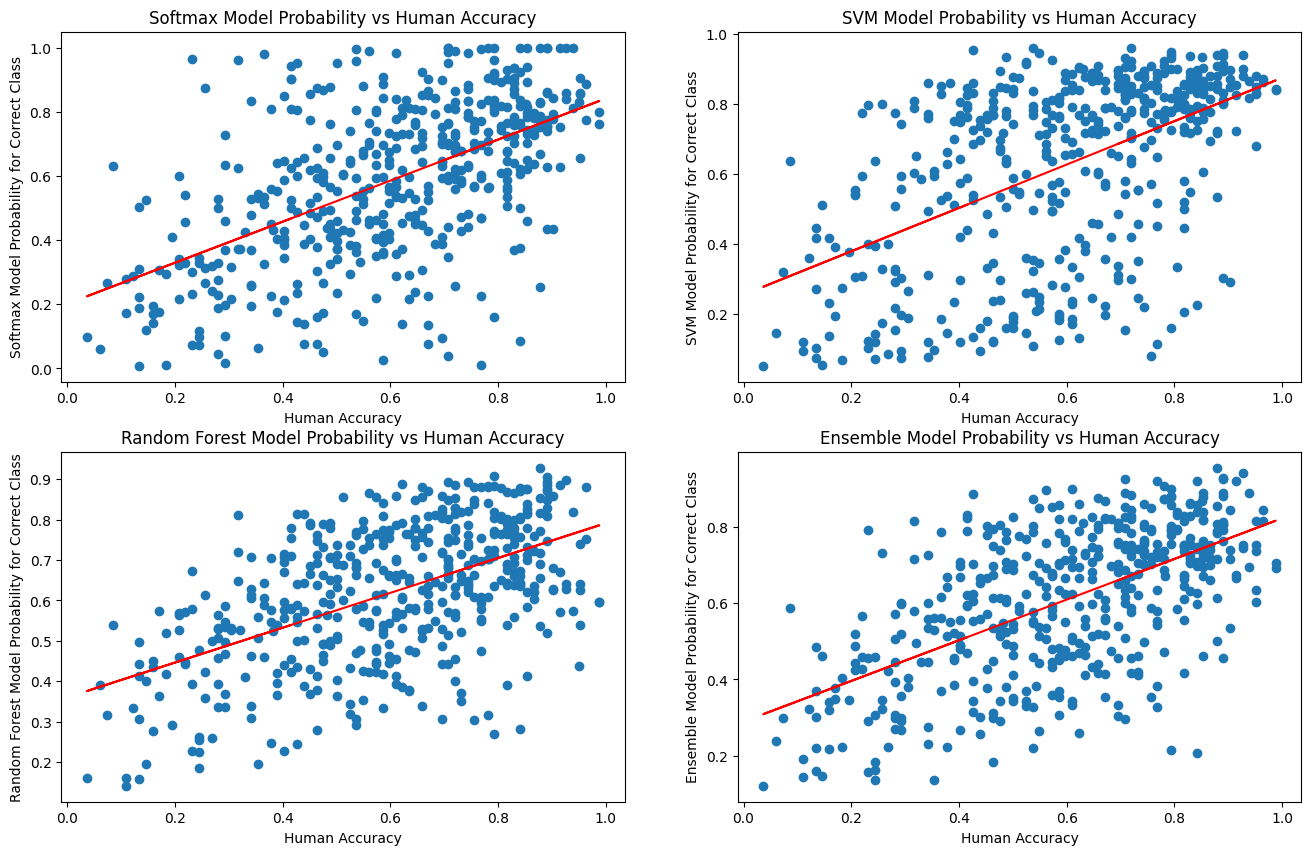

In [123]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

#Human Accuracy vs Softmax Model Accuracy
axes[0, 0].scatter(accuracy_comparison['Human Accuracy'], accuracy_comparison['Softmax Model Accuracy'])
axes[0, 0].set_xlabel('Human Accuracy')
axes[0, 0].set_ylabel('Softmax Model Probability for Correct Class')
axes[0, 0].set_title('Softmax Model Probability vs Human Accuracy')
# Code for trendline created with help of ChatGPT
x = accuracy_comparison['Human Accuracy']
y = accuracy_comparison['Softmax Model Accuracy']
m, b = np.polyfit(x, y, 1)
axes[0, 0].plot(x, m*x + b, color='red', label='Trendline')

#Human Accuracy vs SVM Accuracy
axes[0, 1].scatter(accuracy_comparison['Human Accuracy'], accuracy_comparison['SVM Model Accuracy'])
axes[0, 1].set_xlabel('Human Accuracy')
axes[0, 1].set_ylabel('SVM Model Probability for Correct Class')
axes[0, 1].set_title('SVM Model Probability vs Human Accuracy')
# Code for trendline created with help of ChatGPT
x = accuracy_comparison['Human Accuracy']
y = accuracy_comparison['SVM Model Accuracy']
m, b = np.polyfit(x, y, 1)
axes[0, 1].plot(x, m*x + b, color='red', label='Trendline')

#Human Accuracy vs Ranadom Forest Accuracy
axes[1, 0].scatter(accuracy_comparison['Human Accuracy'], accuracy_comparison['Random Forest Accuracy'])
axes[1, 0].set_xlabel('Human Accuracy')
axes[1, 0].set_ylabel('Random Forest Model Probability for Correct Class')
axes[1, 0].set_title('Random Forest Model Probability vs Human Accuracy')
# Code for trendline created with help of ChatGPT
x = accuracy_comparison['Human Accuracy']
y = accuracy_comparison['Random Forest Accuracy']
m, b = np.polyfit(x, y, 1)
axes[1, 0].plot(x, m*x + b, color='red', label='Trendline')

#Human Accuracy vs Ensemble Accuracy
axes[1, 1].scatter(accuracy_comparison['Human Accuracy'], accuracy_comparison['Ensemble Model Accuracy'])
axes[1, 1].set_xlabel('Human Accuracy')
axes[1, 1].set_ylabel('Ensemble Model Probability for Correct Class')
axes[1, 1].set_title('Ensemble Model Probability vs Human Accuracy')
# Code for trendline created with help of ChatGPT
x = accuracy_comparison['Human Accuracy']
y = accuracy_comparison['Ensemble Model Accuracy']
m, b = np.polyfit(x, y, 1)
axes[1, 1].plot(x, m*x + b, color='red', label='Trendline')

In [124]:
accuracy_comparison.corr()

,Human Accuracy,Softmax Model Accuracy,SVM Model Accuracy,Random Forest Accuracy,Ensemble Model Accuracy
Human Accuracy,1.000000,0.554048,0.513430,0.543820,0.595550
Softmax Model Accuracy,0.554048,1.000000,0.764476,0.694621,0.911178
SVM Model Accuracy,0.513430,0.764476,1.000000,0.766203,0.894391
Random Forest Accuracy,0.543820,0.694621,0.766203,1.000000,0.915336
Ensemble Model Accuracy,0.595550,0.911178,0.894391,0.915336,1.000000


The models had the following correlations with human accuracy:

*   Softmax: .554
*   SVM: .513
*   Random Forest: .544
*   Ensemble: .596

All of the models had a positive relationship with human accuracy and had a correlation between .5 and .6. The Ensemble model, our most accurate model, had the strongest correlation with Human Accuracy.

In [125]:
from scipy.stats import pearsonr

model_columns = ['Softmax Model Accuracy', 'SVM Model Accuracy', 'Random Forest Accuracy', 'Ensemble Model Accuracy']

for col in model_columns:
  correlation_coefficient, p_value = pearsonr(x = accuracy_comparison['Human Accuracy'], y = accuracy_comparison[col])
  print(f'Correlation between Human Accuracy and {col}: {correlation_coefficient:.4f}, P-value: {p_value:.4f}')

Correlation between Human Accuracy and Softmax Model Accuracy: 0.5540, P-value: 0.0000
Correlation between Human Accuracy and SVM Model Accuracy: 0.5134, P-value: 0.0000
Correlation between Human Accuracy and Random Forest Accuracy: 0.5438, P-value: 0.0000
Correlation between Human Accuracy and Ensemble Model Accuracy: 0.5955, P-value: 0.0000


All 4 models had p-values of approximately 0. Using an alpha of .05, all of our p-values were approximately 0, much smaller than .05. All of our correlations appear to be significant.